In [1]:
import matplotlib.pyplot as plt

from report import open_experiment_report, FiveFoldResults, ExperimentReport



In [2]:
res_2c_mlp = open_experiment_report("../results/exp1_2c_mlp")
res_2c_xgb = open_experiment_report("../results/exp1_2c_xgb")
res_6c_mlp = open_experiment_report("../results/exp1_6c_mlp")
res_6c_xgb = open_experiment_report("../results/exp1_6c_xgb")

Found 12 runs in folder exp1_2c_mlp
Found 12 runs in folder exp1_2c_xgb
Found 12 runs in folder exp1_6c_mlp
Found 12 runs in folder exp1_6c_xgb


In [3]:
axis_font_size = 14
title_font_size = 16
fig_title_font_size = 18
legend_font_size = 14

# Final results for the table

In [4]:
def find_best_max(results: list[FiveFoldResults], metric="accuracy"):
    best = (0.0, 0.0, 0) # (max, std, index)
    print(results[0].get_experiment_name())
    for i, res in enumerate(results):
        # print(i)
        max_metric, std = res.get_max(metric)
        final_metric, std = res.get_final(metric)
        if final_metric > best[0]:    
            best = (final_metric, std, i)
        # print(max_metric)

    print(f"    Best {metric} is {best[0]:.4f} ± {best[1]:.4f}")
    print(f"    Final {metric} is {final_metric:.4f}")
    print(f"    {results[best[2]].hyperparameters()}")

find_best_max(res_2c_mlp)
find_best_max(res_6c_mlp)

find_best_max(res_2c_xgb)
find_best_max(res_6c_xgb)

exp1_2c_mlp
    Best accuracy is 0.8380 ± 0.0120
    Final accuracy is 0.8380
    {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1largelayer'}
exp1_6c_mlp
    Best accuracy is 0.8330 ± 0.0130
    Final accuracy is 0.8320
    {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net3layer'}
exp1_2c_xgb
    Best accuracy is 0.8510 ± 0.0030
    Final accuracy is 0.8360
    {'model': 'xgb', 'objective': 'binary:logistic', 'eta': 0.1, 'max_depth': 4, 'eval_metric': 'auc', 'nthread': 16, 'num_parallel_tree': 1, 'subsample': 1.0, 'tree_method': 'hist'}
exp1_6c_xgb
    Best accuracy is 0.8370 ± 0.0140
    Final accuracy is 0.7980
    {'model': 'xgb', 'objective': 'binary:logistic', 'eta': 0.01, 'max_depth': 6, 'eval_metric': 'auc', 'nthread': 16, 'num_parallel_tree': 1, 'subsample': 0.5, 'tree_method': 'hist'}


# Overview of figurs for exp. 1

- Overfitting for XGB over the two federations
- MLP training overfitting?

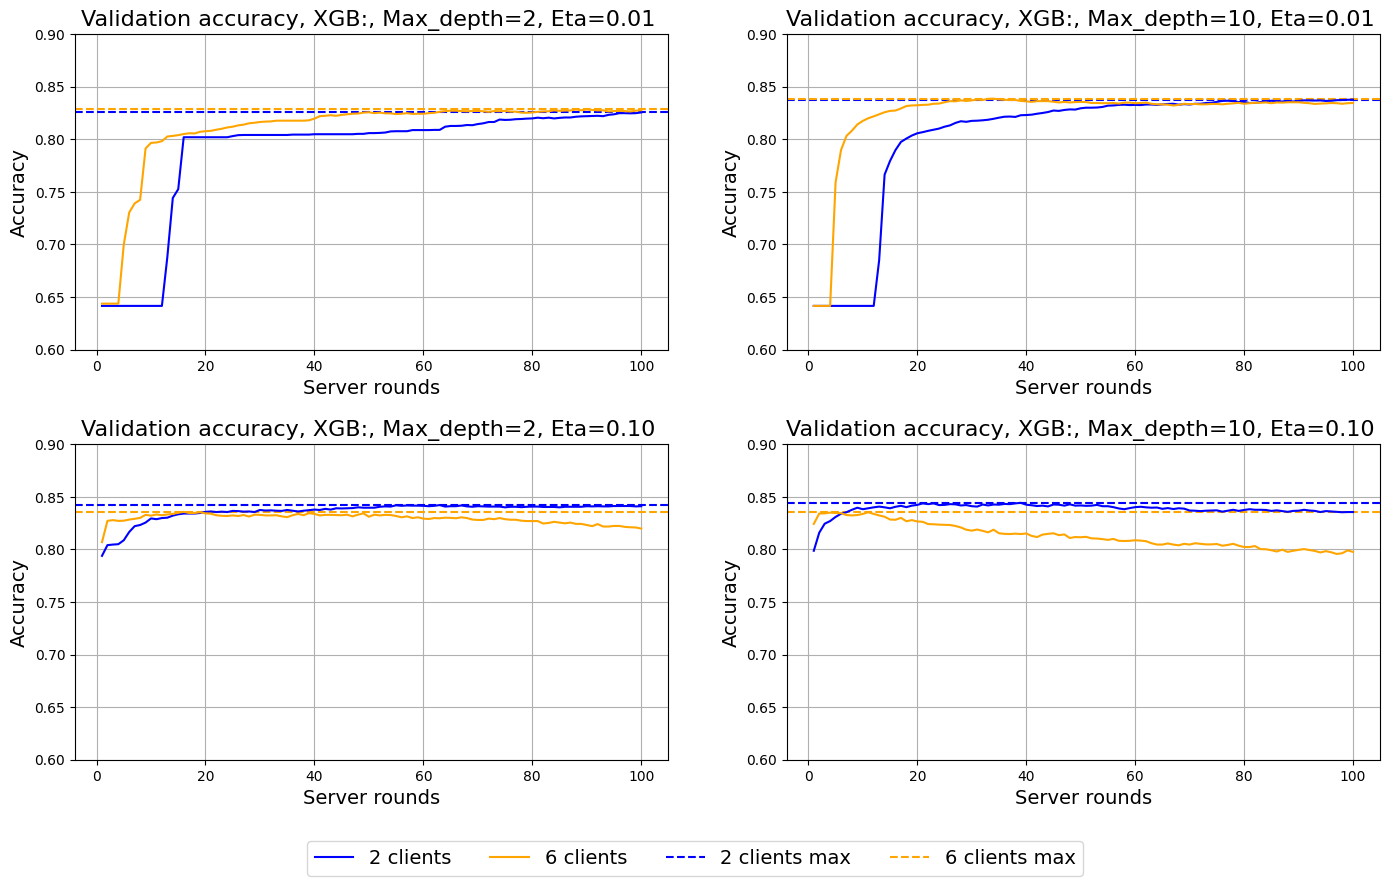

In [5]:
# Overfitting XGB
indicies= [[1, 5],
           [7, 11]]

fig, ax = plt.subplots(2, 2, figsize=(14, 9))

# Create empty lists to store line objects for the legend
line_2c = []
line_6c = []
line_2c_max = []
line_6c_max = []



for i, j in [[0,0], [0,1], [1,0], [1,1]]:
    run_id = indicies[i][j]
    
    run_2c = res_2c_xgb[run_id]
    run_6c = res_6c_xgb[run_id]
    
    r1, m1, s1 = run_2c.get_mean_std("accuracy")
    r2, m2, s2 = run_6c.get_mean_std("accuracy")
    
    eta1 = run_2c.hyperparameters()["eta"]
    eta2 = run_6c.hyperparameters()["eta"]
    
    md1 = run_2c.hyperparameters()["max_depth"]
    if md1 == 8:
        md1 = 10
    
    max_acc_2c = max(m1)
    max_acc_6c = max(m2)
 
    # Add horizontal lines (store references for legend)
    line1 = ax[i,j].axhline(max_acc_2c, color="blue", linestyle="--")
    line2 = ax[i,j].axhline(max_acc_6c, color="orange", linestyle="--")
    
    # Add data lines (store references for legend)
    line3, = ax[i,j].plot(r1, m1, color="blue")
    line4, = ax[i,j].plot(r2, m2, color="orange")
    
    # Store first occurrence of each line type for the legend
    if i == 0 and j == 0:
        line_2c_max.append(line1)
        line_6c_max.append(line2)
        line_2c.append(line3)
        line_6c.append(line4)
    
    # Set subplot title and properties
    ax[i,j].set_title(f"Validation accuracy, XGB:, Max_depth={md1}, Eta={eta1:.2f} ", 
                      fontsize=title_font_size)
    ax[i,j].set_xlabel("Server rounds", fontsize=axis_font_size)
    ax[i,j].set_ylabel("Accuracy", fontsize=axis_font_size)
    ax[i,j].set_ylim(0.6,0.9)
    ax[i,j].grid()
    

# Create a combined legend
fig.legend(
    [line_2c[0], line_6c[0], line_2c_max[0], line_6c_max[0]],
    ["2 clients", "6 clients", "2 clients max", "6 clients max"],
    loc="lower center", 
    bbox_to_anchor=(0.5, 0.01),
    ncol=4
    , fontsize=legend_font_size
)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.2, bottom=0.15)  # Increased bottom margin for legend

fig.savefig("graphs/exp1_xgb.svg", dpi=300, bbox_inches='tight')


In [6]:
for i, run in enumerate(res_2c_mlp):
    print(i)
    print(run.hyperparameters())


0
{'model': 'mlp', 'lr': 0.001, 'mlp-name': 'Net1layer'}
1
{'model': 'mlp', 'lr': 0.001, 'mlp-name': 'Net1largelayer'}
2
{'model': 'mlp', 'lr': 0.001, 'mlp-name': 'Net2layer'}
3
{'model': 'mlp', 'lr': 0.001, 'mlp-name': 'Net3layer'}
4
{'model': 'mlp', 'lr': 0.01, 'mlp-name': 'Net1layer'}
5
{'model': 'mlp', 'lr': 0.01, 'mlp-name': 'Net1largelayer'}
6
{'model': 'mlp', 'lr': 0.01, 'mlp-name': 'Net2layer'}
7
{'model': 'mlp', 'lr': 0.01, 'mlp-name': 'Net3layer'}
8
{'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net3layer'}
9
{'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net2layer'}
10
{'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1layer'}
11
{'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1largelayer'}


Run 11 - {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1largelayer'}
Run 10 - {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1layer'}
Run 9 - {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net2layer'}
Run 8 - {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net3layer'}


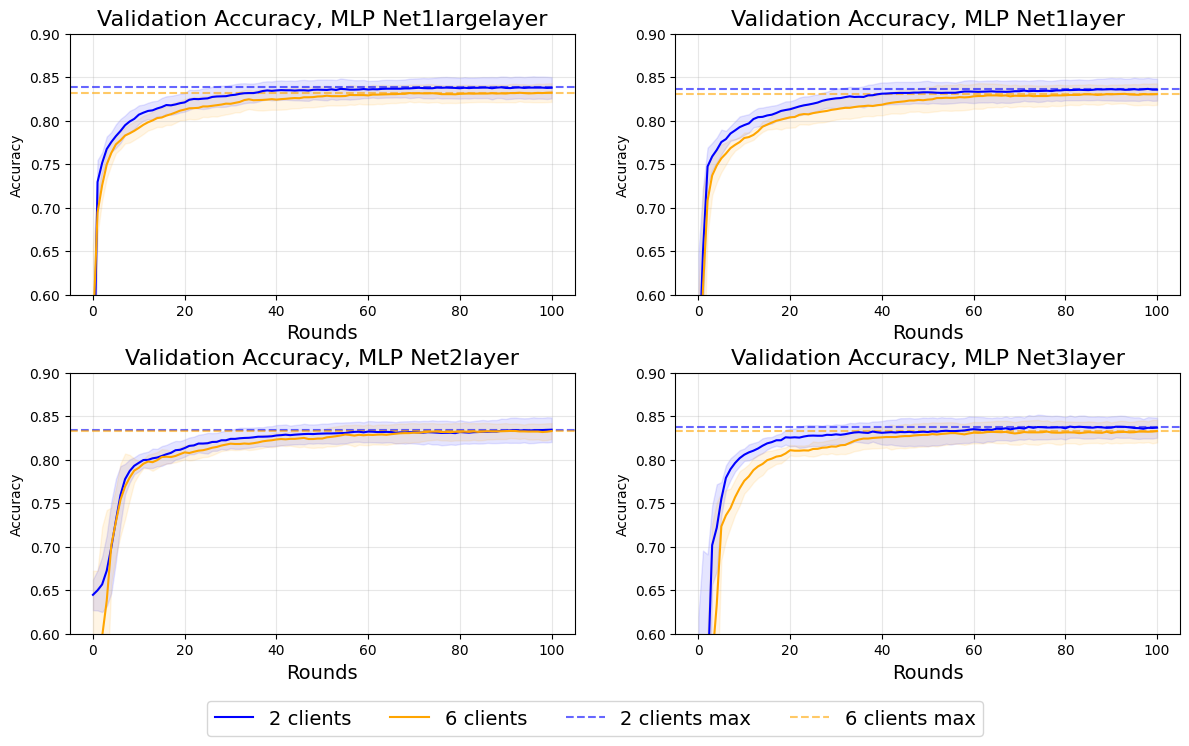

In [43]:
fig, ax = plt.subplots(2,2, figsize=(12, 8))

indicies= [[11, 10],
           [9, 8]]

# Create empty lists to store line objects for the legend
line_2c = []
line_6c = []
line_2c_max = []
line_6c_max = []

for i, j in [[0,0], [0,1], [1,0], [1,1]]:
    run_id = indicies[i][j]
    
    run_2c = res_2c_mlp[run_id]
    run_6c = res_6c_mlp[run_id]
    hyperparams = run_2c.hyperparameters()
    lr = hyperparams['lr']
    net = hyperparams['mlp-name']

    print(f"Run {run_id} - {hyperparams}")

    rounds, accuracy_mean2, accuracy_std2 = run_2c.get_mean_std("accuracy")
    rounds, accuracy_mean6, accuracy_std6 = run_6c.get_mean_std("accuracy")
    
    # Find max accuracies
    max_acc_2c = max(accuracy_mean2)
    max_acc_6c = max(accuracy_mean6)
    
    # Add horizontal lines for max values
    line1 = ax[i,j].axhline(max_acc_2c, color="blue", linestyle="--", alpha=0.6)
    line2 = ax[i,j].axhline(max_acc_6c, color="orange", linestyle="--", alpha=0.6)
    
    # Add data lines
    line3, = ax[i,j].plot(rounds, accuracy_mean2, '-', color="blue")
    ax[i,j].fill_between(rounds, accuracy_mean2 - accuracy_std2, accuracy_mean2 + accuracy_std2, alpha=0.1, color="blue")
    
    line4, = ax[i,j].plot(rounds, accuracy_mean6, '-', color="orange")
    ax[i,j].fill_between(rounds, accuracy_mean6 - accuracy_std6, accuracy_mean6 + accuracy_std6, alpha=0.1, color="orange")
    
    # Store first occurrence of each line type for the legend
    if i == 0 and j == 0:
        line_2c_max.append(line1)
        line_6c_max.append(line2)
        line_2c.append(line3)
        line_6c.append(line4)

    ax[i,j].set_title(f"Validation Accuracy, MLP {net}", fontsize=title_font_size)
    ax[i,j].grid(alpha=0.3)
    ax[i,j].set_ylim(0.6, 0.9)
    ax[i,j].set_xlabel("Rounds", fontsize=axis_font_size)
    
    # Add y-axis label only to leftmost plots
    ax[i,j].set_ylabel("Accuracy")

# Create a combined legend
fig.legend(
    [line_2c[0], line_6c[0], line_2c_max[0], line_6c_max[0]],
    ["2 clients", "6 clients", "2 clients max", "6 clients max"],
    loc="lower center", 
    bbox_to_anchor=(0.5, 0.01),
    ncol=4, fontsize=legend_font_size
)

# Add overall title

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.2, bottom=0.15, top=0.9)  # Increased bottom margin for legend, top margin for title

fig.savefig("graphs/exp1_mlp_arc.svg", dpi=300, bbox_inches='tight')


# Overfitting based on learning rate

Run 4 - {'model': 'mlp', 'lr': 0.01, 'mlp-name': 'Net1layer'}
Run 0 - {'model': 'mlp', 'lr': 0.001, 'mlp-name': 'Net1layer'}
Run 10 - {'model': 'mlp', 'lr': 0.0001, 'mlp-name': 'Net1layer'}


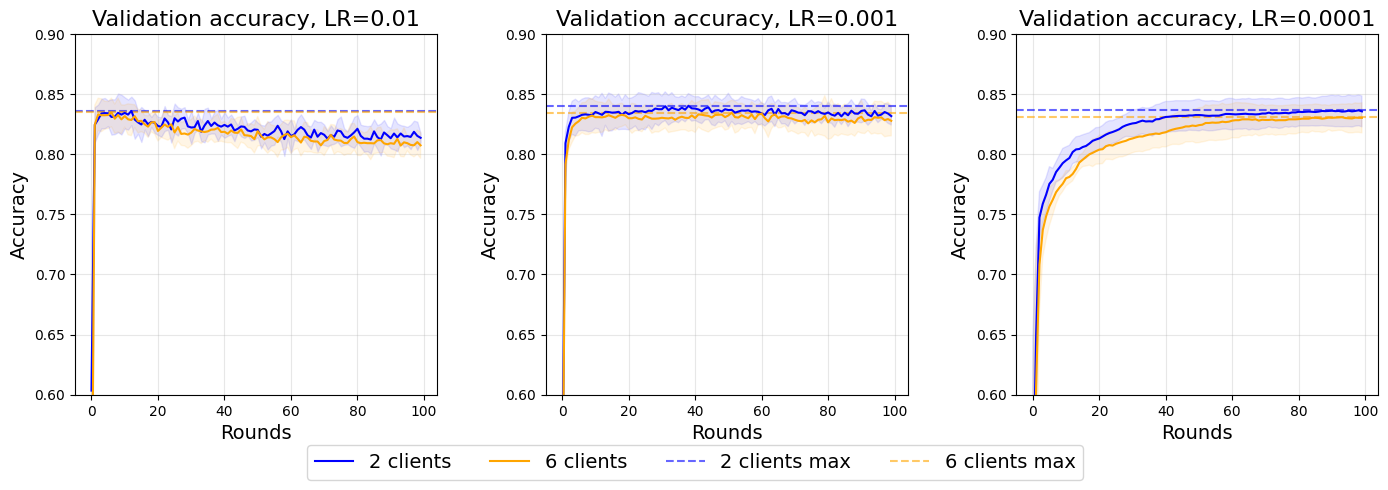

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 5))

indicies = [4, 0, 10]

# Create empty lists to store line objects for the legend
line_2c = []
line_6c = []
line_2c_max = []
line_6c_max = []

for i in range(3):
    run_id = indicies[i]
    
    run_2c = res_2c_mlp[run_id]
    run_6c = res_6c_mlp[run_id]
    hyperparams = run_2c.hyperparameters()
    lr = hyperparams['lr']
    net = hyperparams['mlp-name']

    print(f"Run {run_id} - {hyperparams}")

    rounds, accuracy_mean2, accuracy_std2 = run_2c.get_mean_std("accuracy")
    rounds, accuracy_mean6, accuracy_std6 = run_6c.get_mean_std("accuracy")
    
    # Limit to first 100 rounds if needed
    limit = 100
    if len(rounds) > limit:
        rounds = rounds[:limit]
        accuracy_mean2 = accuracy_mean2[:limit]
        accuracy_std2 = accuracy_std2[:limit]
        accuracy_mean6 = accuracy_mean6[:limit]
        accuracy_std6 = accuracy_std6[:limit]
    
    # Find max accuracies
    max_acc_2c = max(accuracy_mean2)
    max_acc_6c = max(accuracy_mean6)
    
    # Add horizontal lines for max values
    line1 = ax[i].axhline(max_acc_2c, color="blue", linestyle="--", alpha=0.6)
    line2 = ax[i].axhline(max_acc_6c, color="orange", linestyle="--", alpha=0.6)
    
    # Add data lines
    line3, = ax[i].plot(rounds, accuracy_mean2, '-', color="blue")
    ax[i].fill_between(rounds, accuracy_mean2 - accuracy_std2, accuracy_mean2 + accuracy_std2, alpha=0.1, color="blue")
    
    line4, = ax[i].plot(rounds, accuracy_mean6, '-', color="orange")
    ax[i].fill_between(rounds, accuracy_mean6 - accuracy_std6, accuracy_mean6 + accuracy_std6, alpha=0.1, color="orange")
    
    # Store first occurrence of each line type for the legend
    if i == 0:
        line_2c_max.append(line1)
        line_6c_max.append(line2)
        line_2c.append(line3)
        line_6c.append(line4)
    
    ax[i].set_title(f"Validation accuracy, LR={lr}", fontsize=title_font_size)
    ax[i].grid(alpha=0.3)
    ax[i].set_ylim(0.6, 0.9)
    ax[i].set_xlabel("Rounds", fontsize=axis_font_size)

    # Add y-axis label only to leftmost plot
    ax[i].set_ylabel("Accuracy", fontsize=axis_font_size)

# Create a combined legend
fig.legend(
    [line_2c[0], line_6c[0], line_2c_max[0], line_6c_max[0]],
    ["2 clients", "6 clients", "2 clients max", "6 clients max"],
    loc="lower center", 
    bbox_to_anchor=(0.5, 0.01),
    ncol=4,
    fontsize=legend_font_size
)

# Add overall title with learning rate

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.2)  # Increased bottom margin for legend, top margin for title

fig.savefig("graphs/exp1_mlp_lr.svg", dpi=300, bbox_inches='tight')

In [42]:
for i, run in enumerate(res_2c_mlp):
    hp = run.hyperparameters()
    hp_important = {k: hp[k] for k in ['mlp-name', 'lr']}
    mean, std = run.get_final("accuracy")
    print(f"Run {i} - {hp_important}, {mean:.4f} ± {std:.4f}")

print("6 clients")
    
for i, run in enumerate(res_6c_mlp):
    hp = run.hyperparameters()
    hp_important = {k: hp[k] for k in ['mlp-name', 'lr']}
    mean, std = run.get_final("accuracy")
    print(f"Run {i} - {hp_important}, {mean:.4f} ± {std:.4f}")

Run 0 - {'mlp-name': 'Net1layer', 'lr': 0.001}, 0.8210 ± 0.0110
Run 1 - {'mlp-name': 'Net1largelayer', 'lr': 0.001}, 0.8190 ± 0.0160
Run 2 - {'mlp-name': 'Net2layer', 'lr': 0.001}, 0.8100 ± 0.0110
Run 3 - {'mlp-name': 'Net3layer', 'lr': 0.001}, 0.7980 ± 0.0170
Run 4 - {'mlp-name': 'Net1layer', 'lr': 0.01}, 0.8030 ± 0.0080
Run 5 - {'mlp-name': 'Net1largelayer', 'lr': 0.01}, 0.8090 ± 0.0150
Run 6 - {'mlp-name': 'Net2layer', 'lr': 0.01}, 0.8100 ± 0.0110
Run 7 - {'mlp-name': 'Net3layer', 'lr': 0.01}, 0.8190 ± 0.0080
Run 8 - {'mlp-name': 'Net3layer', 'lr': 0.0001}, 0.8370 ± 0.0120
Run 9 - {'mlp-name': 'Net2layer', 'lr': 0.0001}, 0.8350 ± 0.0140
Run 10 - {'mlp-name': 'Net1layer', 'lr': 0.0001}, 0.8360 ± 0.0130
Run 11 - {'mlp-name': 'Net1largelayer', 'lr': 0.0001}, 0.8380 ± 0.0120
6 clients
Run 0 - {'mlp-name': 'Net1layer', 'lr': 0.001}, 0.8160 ± 0.0130
Run 1 - {'mlp-name': 'Net1largelayer', 'lr': 0.001}, 0.8190 ± 0.0120
Run 2 - {'mlp-name': 'Net2layer', 'lr': 0.001}, 0.8060 ± 0.0120
Run 3 - 

In [ ]:
# XGB results for table
for i, run in enumerate(zip(res_2c_xgb, res_6c_xgb)):
    run_2c, run_6c = run
    hp = run_2c.hyperparameters()
    hp_important = {k: hp[k] for k in ['eta', 'max_depth', 'subsample']}
    mean, std = run_2c.get_final("accuracy")
    mean6, std6 = run_6c.get_final("accuracy")
    print(f"Run {i} - {hp_important}, 2 clients: {mean:.4f} ± {std:.4f}, 6 clients: {mean6:.4f} ± {std6:.4f}")

Run 0 - {'eta': 0.01, 'max_depth': 2, 'subsample': 0.5}, 2 clients: 0.8270 ± 0.0100, 6 clients: 0.8360 ± 0.0150
Run 1 - {'eta': 0.01, 'max_depth': 2, 'subsample': 1.0}, 2 clients: 0.8250 ± 0.0100, 6 clients: 0.8280 ± 0.0100
Run 2 - {'eta': 0.01, 'max_depth': 4, 'subsample': 0.5}, 2 clients: 0.8340 ± 0.0110, 6 clients: 0.8310 ± 0.0130
Run 3 - {'eta': 0.01, 'max_depth': 4, 'subsample': 1.0}, 2 clients: 0.8320 ± 0.0110, 6 clients: 0.8320 ± 0.0100
Run 4 - {'eta': 0.01, 'max_depth': 8, 'subsample': 0.5}, 2 clients: 0.8400 ± 0.0140, 6 clients: 0.8370 ± 0.0140
Run 5 - {'eta': 0.01, 'max_depth': 8, 'subsample': 1.0}, 2 clients: 0.8380 ± 0.0160, 6 clients: 0.8340 ± 0.0140
Run 6 - {'eta': 0.1, 'max_depth': 2, 'subsample': 0.5}, 2 clients: 0.8410 ± 0.0100, 6 clients: 0.8330 ± 0.0140
Run 7 - {'eta': 0.1, 'max_depth': 2, 'subsample': 1.0}, 2 clients: 0.8410 ± 0.0140, 6 clients: 0.8200 ± 0.0100
Run 8 - {'eta': 0.1, 'max_depth': 4, 'subsample': 0.5}, 2 clients: 0.8450 ± 0.0090, 6 clients: 0.8270 ± 0.